aca se generaran datos sinteticos para equlibrar las clases de datos
En proceso...


In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Reshape,Flatten

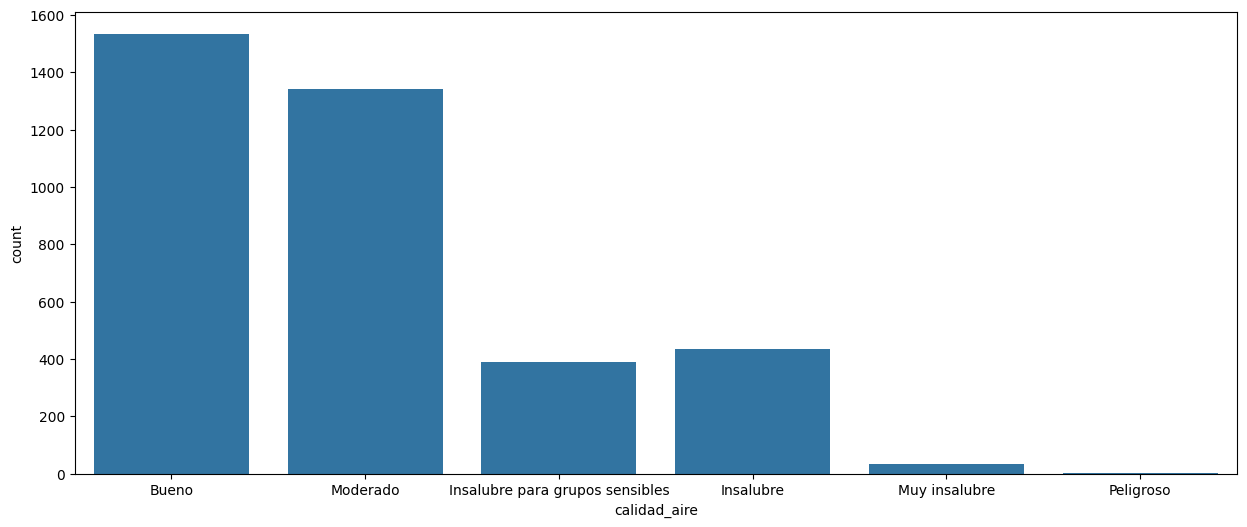

In [167]:
data_set_contaminantes = pd.read_csv('../../data/processed/normalizados/Dataset_MinMax.csv',sep=';',decimal=',')
data_set_contaminantes['fecha'] = pd.to_datetime(data_set_contaminantes['fecha'])
# Ejemplo de ajuste de tamaño del gráfico
plt.figure(figsize=(15, 6))
sns.countplot(x=data_set_contaminantes["calidad_aire"])
plt.show()


Crear secuencias con datos minoritarios para generar data sintetica

In [168]:
# Mapeo manual de etiquetas a números
mapeo_etiquetas = {
    'Bueno': 0,
    'Moderado': 1,
    'Insalubre para grupos sensibles': 2,
    'Insalubre': 3,
    'Muy insalubre': 4,
    'Peligroso': 5
}   

# Aplicar el mapeo al DataFrame
data_set_contaminantes['calidad_aire_codificada'] = data_set_contaminantes['calidad_aire'].map(mapeo_etiquetas)
data_set_contaminantes

,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,calidad_aire,year,estacion,mes,mes_sin,mes_cos,dia,dia_sin,dia_cos,calidad_aire_codificada
0,2013-01-01,0.0282,0.0594,0.2366,0.6306,0.8301,0.1680,0.0000,0.0965,Bueno,0.0,0.0000,0.0000,0.75,0.933,0.0000,0.6008,0.9897,0
1,2013-01-02,0.0431,0.0929,0.2153,0.7204,0.8548,0.1680,0.0000,0.1404,Moderado,0.0,0.0000,0.0000,0.75,0.933,0.0333,0.6974,0.9594,1
2,2013-01-03,0.0379,0.0717,0.4858,0.7776,0.7089,0.1195,0.0000,0.1316,Moderado,0.0,0.0000,0.0000,0.75,0.933,0.0667,0.7860,0.9102,1
3,2013-01-04,0.0394,0.0839,0.5667,0.7837,0.6561,0.1195,0.0000,0.1345,Moderado,0.0,0.0000,0.0000,0.75,0.933,0.1000,0.8629,0.8441,1
4,2013-01-05,0.0258,0.0628,0.3569,0.7302,0.7754,0.1755,0.0000,0.0877,Bueno,0.0,0.0000,0.0000,0.75,0.933,0.1333,0.9249,0.7639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2023-03-27,0.0592,0.1281,0.3616,0.4112,0.5345,0.1650,0.0000,0.1696,Moderado,1.0,0.6667,0.1818,1.00,0.500,0.8667,0.1371,0.8441,1
3736,2023-03-28,0.0162,0.0525,0.6990,0.5617,0.4218,0.1979,0.0011,0.0526,Bueno,1.0,0.6667,0.1818,1.00,0.500,0.9000,0.2140,0.9102,0
3737,2023-03-29,0.0147,0.0478,0.4931,0.4281,0.4593,0.3207,0.0000,0.0468,Bueno,1.0,0.6667,0.1818,1.00,0.500,0.9333,0.3026,0.9594,0
3738,2023-03-30,0.0314,0.0802,0.3777,0.3048,0.4338,0.4077,0.0000,0.1082,Bueno,1.0,0.6667,0.1818,1.00,0.500,0.9667,0.3992,0.9897,0


In [169]:


# Crear una instancia del escalador
scaler = MinMaxScaler()

# Ajustar y transformar la columna codificada
data_set_contaminantes['calidad_aire_codificada'] = scaler.fit_transform(data_set_contaminantes[['calidad_aire_codificada']])


 
valores_deseados = [ 'Insalubre para grupos sensibles','Insalubre', 'Muy insalubre']  # Lista de valores deseados

data_objetivo = data_set_contaminantes[data_set_contaminantes['calidad_aire'].isin(valores_deseados)]

data_objetivo = data_objetivo.sort_values(by='fecha')






In [170]:
data_objetivo= data_objetivo.drop(columns=['calidad_aire','year','mes','dia'], axis=1)
data_objetivo.head()

,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,estacion,mes_sin,mes_cos,dia_sin,dia_cos,calidad_aire_codificada
74,2013-03-16,0.1454,0.2832,0.2175,0.4788,0.6884,0.1024,0.0,0.3392,0.0000,1.000,0.50,0.4494,0.0000,0.4
93,2013-04-04,0.1169,0.1698,0.6327,0.6469,0.5222,0.2924,0.0,0.2778,0.6667,0.933,0.25,0.8629,0.8441,0.4
113,2013-04-24,0.2573,0.3550,0.6367,0.5431,0.4518,0.1615,0.0,0.4561,0.6667,0.933,0.25,0.0051,0.5746,0.6
114,2013-04-25,0.1869,0.2385,0.5779,0.4668,0.4363,0.0954,0.0,0.4240,0.6667,0.933,0.25,0.0305,0.6728,0.6
115,2013-04-26,0.1942,0.2135,0.6724,0.5251,0.4093,0.2630,0.0,0.4298,0.6667,0.933,0.25,0.0751,0.7639,0.6


In [171]:
data_objetivo

,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,estacion,mes_sin,mes_cos,dia_sin,dia_cos,calidad_aire_codificada
74,2013-03-16,0.1454,0.2832,0.2175,0.4788,0.6884,0.1024,0.0,0.3392,0.0000,1.000,0.50,0.4494,0.0000,0.4
93,2013-04-04,0.1169,0.1698,0.6327,0.6469,0.5222,0.2924,0.0,0.2778,0.6667,0.933,0.25,0.8629,0.8441,0.4
113,2013-04-24,0.2573,0.3550,0.6367,0.5431,0.4518,0.1615,0.0,0.4561,0.6667,0.933,0.25,0.0051,0.5746,0.6
114,2013-04-25,0.1869,0.2385,0.5779,0.4668,0.4363,0.0954,0.0,0.4240,0.6667,0.933,0.25,0.0305,0.6728,0.6
115,2013-04-26,0.1942,0.2135,0.6724,0.5251,0.4093,0.2630,0.0,0.4298,0.6667,0.933,0.25,0.0751,0.7639,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,2023-02-09,0.2887,0.3410,0.3483,0.6378,0.7679,0.3320,0.0,0.4708,0.0000,0.933,0.75,0.9847,0.3731,0.6
3690,2023-02-10,0.1203,0.1682,0.3472,0.7054,0.7737,0.3578,0.0,0.2865,0.0000,0.933,0.75,0.9495,0.2780,0.4
3691,2023-02-11,0.1593,0.2083,0.2647,0.5512,0.7366,0.3752,0.0,0.3684,0.0000,0.933,0.75,0.8959,0.1919,0.4
3699,2023-02-19,0.1356,0.2114,0.1765,0.3564,0.6421,0.1960,0.0,0.3187,0.0000,0.933,0.75,0.1739,0.1184,0.4


In [172]:
# Calcular las diferencias de tiempo entre filas consecutivas
diferencias_tiempo = data_objetivo['fecha'].diff()
data_objetivo= data_objetivo.drop('fecha', axis=1)
# Definir un umbral para identificar huecos (por ejemplo, 1 día)
umbral_hueco = pd.Timedelta(days=1)

# Identificar los índices donde los huecos ocurren
indices_huecos = diferencias_tiempo > umbral_hueco
indices_huecos = indices_huecos[indices_huecos].index

# Separar los datos en segmentos
segmentos = []
inicio = 0
for indice in indices_huecos:
    fin = indice
    segmento = data_objetivo.iloc[inicio:fin]
    segmentos.append(segmento)
    inicio = fin

# No olvides añadir el último segmento
segmentos.append(data_objetivo.iloc[inicio:])

In [173]:
data_objetivo.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,estacion,mes_sin,mes_cos,dia_sin,dia_cos,calidad_aire_codificada
74,0.1454,0.2832,0.2175,0.4788,0.6884,0.1024,0.0,0.3392,0.0000,1.000,0.50,0.4494,0.0000,0.4
93,0.1169,0.1698,0.6327,0.6469,0.5222,0.2924,0.0,0.2778,0.6667,0.933,0.25,0.8629,0.8441,0.4
113,0.2573,0.3550,0.6367,0.5431,0.4518,0.1615,0.0,0.4561,0.6667,0.933,0.25,0.0051,0.5746,0.6
114,0.1869,0.2385,0.5779,0.4668,0.4363,0.0954,0.0,0.4240,0.6667,0.933,0.25,0.0305,0.6728,0.6
115,0.1942,0.2135,0.6724,0.5251,0.4093,0.2630,0.0,0.4298,0.6667,0.933,0.25,0.0751,0.7639,0.6


In [181]:
# def create_sequences(df, target_column, n_steps, horizon):
#     X, y = [], []
#     for i in range(len(df) - n_steps - horizon + 1):
#         seq_x = df.iloc[i:(i + n_steps)].values
#         seq_y = df[target_column].iloc[(i + n_steps):(i + n_steps + horizon)].values
#         X.append(seq_x)
#         y.append(seq_y)
    
#     return np.array(X), np.array(y)




n_steps=1
X_total = []

for segmento in segmentos:
    # Asegúrate de que cada segmento tenga suficientes datos para formar al menos una secuencia
    if len(segmento) >= n_steps:
        # Crear secuencias dentro de cada segmento
        for i in range(len(segmento) - n_steps + 1):
            seq_x = segmento.iloc[i:(i + n_steps)].values
            X_total.append(seq_x)

X_total = np.array(X_total)

print(X_total.shape)


# ACA GENERAMOS X_TOTAL QUE VENDRIA A HACER UNA MATRIZ CON 861 EJEMPLOS 


(861, 1, 14)


In [175]:
# train_size = int(len(X_total) * (1 - 0.2)) # 0.2 = test size
# X_train, X_test = X_total[:train_size], X_total[train_size:]
# y_train, y_test = y_total[:train_size], y_total[train_size:]

print(X_total.shape)
print(y_total.shape)
print(len(X_total))

(794, 1, 14)
(794, 1)
794


se define el generador y el discriminador


In [176]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(256, input_dim=100))  
    model.add(Reshape((1, 256)))
    
    # Ajustar a la salida deseada: Por ejemplo, si X_total es (n, 1, 19)
    model.add(LSTM(14, return_sequences=True))  # 19 características, 1 paso en el tiempo

    return model

def build_discriminator():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_total.shape[1], X_total.shape[2])), return_sequences=False)  # False si es un solo paso de tiempo
    model.add(Dense(1, activation='sigmoid'))  
    return model



In [177]:
import numpy as np

batch_size = 32
dataset = 

def train_gan(gan, dataset, batch_size, epochs):
    generator, discriminator = gan.layers

    for epoch in range(epochs):
        for _ in range(batch_size):
            # Datos reales
            real_x = np.random.choice(dataset, batch_size)
            real_y = np.ones((batch_size, 1))

            # Generar datos falsos
            noise = np.random.normal(0, 1, (batch_size, input_shape_generator))
            fake_x = generator.predict(noise)
            fake_y = np.zeros((batch_size, 1))

            # Entrenar el discriminador
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(real_x, real_y)
            d_loss_fake = discriminator.train_on_batch(fake_x, fake_y)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Entrenar el generador
            noise = np.random.normal(0, 1, (batch_size, input_shape_generator))
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

            discriminator.trainable = False

        print(f"Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")


SyntaxError: invalid syntax (4019634440.py, line 4)